# Fine-tune a YOLOv8 detection model

This notebook will train a [Yolov8](https://github.com/ultralytics/ultralytics) model for tank detection using publicly available annotated images of tanks.

As the notebook will run the training with `PyTorch`, it is recommended to have GPUs available. If running in Google Colab, go to Edit > Notebook settings and select GPU hardware acceleration.

This notebook expects that the dataset created in the notebook [01_Dataset](./01_Dataset.ipynb) has been saved to disk.

### Setup

To start, check GPU support.

In [16]:
import torch

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.3.1+cu121 (NVIDIA RTX A6000)


### Load dataset

We'll first load the dataset created on disk.

In [17]:
from pathlib import Path

dataset_dir = Path() / "dataset"

In [18]:
import fiftyone as fo

# The splits to load
splits = ["train", "val", "test"]

# Load the dataset, using tags to mark the samples in each split
dataset = fo.Dataset()
for split in splits:
    dataset.add_dir(
        dataset_dir=dataset_dir,
        dataset_type=fo.types.YOLOv5Dataset,
        split=split,
        tags=split,
)

 100% |███████████████| 2668/2668 [2.2s elapsed, 0s remaining, 1.2K samples/s]       
 100% |█████████████████| 334/334 [281.3ms elapsed, 0s remaining, 1.2K samples/s]     
 100% |█████████████████| 333/333 [263.1ms elapsed, 0s remaining, 1.3K samples/s]     


In [19]:
session = fo.launch_app(dataset, auto=False)

Session launched. Run `session.show()` to open the App in a cell output.



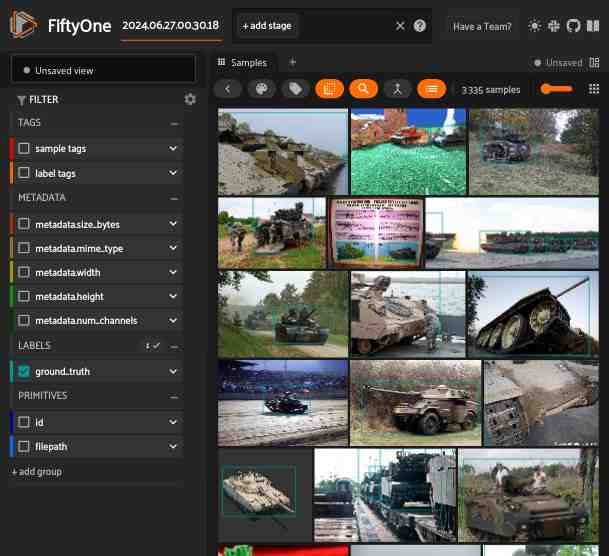

In [20]:
session.show()

### Train a YoloV8 model

We can now train a YoloV8 base model on our exported dataset. We use the `yolov8n.pt` (nano) model, which is the smallest, but larger models are available from ultralytics. Simply replace `yolov8n.pt` with the [right model](https://docs.ultralytics.com/models/yolov8/#key-features).

In [21]:
from adomvi.yolo.yolo import train

results_train = train("yolov8m.pt", data=dataset_dir / "dataset.yaml", batch=64, device=0)

#Load the path of the training model results
results_train_dir = Path(results_train.save_dir)


New https://pypi.org/project/ultralytics/8.2.45 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.38 🚀 Python-3.10.14 torch-2.3.1+cu121 CUDA:0 (NVIDIA RTX A6000, 48677MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=dataset/dataset.yaml, epochs=60, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fr

train: Scanning /home/ukemkata/workspace/adomvi2/notebooks/dataset/labels/train.cache... 2668 images, 41 backgrounds, 0 corrupt: 100%|██████████| 2668/2668 [00:00<?, ?it/s]
val: Scanning /home/ukemkata/workspace/adomvi2/notebooks/dataset/labels/val.cache... 334 images, 2 backgrounds, 0 corrupt: 100%|██████████| 334/334 [00:00<?, ?it/s]


Plotting labels to runs/detect/train7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train7
Starting training for 60 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/60      25.8G      1.001      2.413       1.44        133        640: 100%|██████████| 42/42 [01:07<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.17it/s]

                   all        334        432       0.19      0.218      0.158     0.0852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/60      25.8G      1.098      1.511      1.515        157        640: 100%|██████████| 42/42 [00:37<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.17s/it]

                   all        334        432      0.295     0.0967     0.0282     0.0102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/60      25.7G      1.232      1.579      1.604        138        640: 100%|██████████| 42/42 [00:43<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.61s/it]

                   all        334        432      0.288      0.253     0.0304    0.00973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/60      25.7G       1.25      1.602       1.62        142        640: 100%|██████████| 42/42 [00:44<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.72s/it]

                   all        334        432      0.299      0.144     0.0407    0.00979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/60      25.7G      1.185      1.512      1.555        128        640: 100%|██████████| 42/42 [00:44<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.30s/it]

                   all        334        432      0.484      0.264      0.188     0.0951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/60      25.8G      1.136      1.435      1.518        131        640: 100%|██████████| 42/42 [00:44<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.26s/it]

                   all        334        432        0.5      0.401      0.289       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/60      25.7G      1.083      1.376      1.484        140        640: 100%|██████████| 42/42 [00:44<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.41s/it]

                   all        334        432      0.505      0.401       0.32      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/60      25.7G      1.038      1.319      1.458        128        640: 100%|██████████| 42/42 [00:44<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.91s/it]

                   all        334        432      0.562      0.489      0.412      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/60      25.7G      1.013      1.276      1.432        128        640: 100%|██████████| 42/42 [00:44<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.21s/it]

                   all        334        432      0.564      0.501      0.442      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/60      25.7G      1.009      1.236       1.43        139        640: 100%|██████████| 42/42 [00:44<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]

                   all        334        432      0.616      0.467      0.467      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/60      25.7G     0.9811      1.217      1.415        131        640: 100%|██████████| 42/42 [00:43<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.77s/it]

                   all        334        432      0.723      0.431      0.452      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/60      25.7G     0.9555      1.168      1.384        126        640: 100%|██████████| 42/42 [00:44<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.09s/it]

                   all        334        432      0.795      0.486       0.55      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/60      25.7G     0.9418      1.144      1.379        134        640: 100%|██████████| 42/42 [00:43<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.18s/it]

                   all        334        432      0.724      0.437      0.487       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/60      25.7G     0.9207      1.123      1.366        139        640: 100%|██████████| 42/42 [00:43<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.29s/it]

                   all        334        432      0.775      0.518      0.576      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/60      25.7G     0.8861      1.097      1.338        134        640: 100%|██████████| 42/42 [00:44<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]

                   all        334        432      0.785      0.541      0.607      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/60      25.7G     0.8931      1.043      1.344        162        640: 100%|██████████| 42/42 [00:38<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.18s/it]

                   all        334        432      0.781      0.482      0.584      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/60      25.7G     0.8898      1.024      1.335        119        640: 100%|██████████| 42/42 [00:38<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.17s/it]

                   all        334        432      0.749       0.49      0.555      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/60      25.8G     0.8718      1.036      1.327        137        640: 100%|██████████| 42/42 [00:38<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.18s/it]

                   all        334        432      0.464      0.542      0.509      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/60      25.7G     0.8393     0.9872      1.305        136        640: 100%|██████████| 42/42 [00:38<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.15s/it]

                   all        334        432      0.499       0.57      0.582      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/60      25.7G     0.8107     0.9416      1.286        131        640: 100%|██████████| 42/42 [00:38<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.04s/it]

                   all        334        432      0.524      0.543      0.606      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/60      25.7G     0.8328      0.946      1.296        141        640: 100%|██████████| 42/42 [00:38<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.71s/it]

                   all        334        432      0.656      0.583      0.623      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/60      25.7G     0.8132     0.9358      1.287        156        640: 100%|██████████| 42/42 [00:44<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]

                   all        334        432      0.859       0.52      0.649      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/60      25.8G     0.8034     0.9046      1.277        139        640: 100%|██████████| 42/42 [00:44<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]

                   all        334        432      0.755      0.463      0.597      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/60      25.7G     0.7985     0.8932      1.271        156        640: 100%|██████████| 42/42 [00:44<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.13s/it]

                   all        334        432      0.514      0.592      0.585      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/60      25.7G     0.7876     0.8947      1.265        142        640: 100%|██████████| 42/42 [00:43<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.53s/it]

                   all        334        432      0.682      0.669      0.731      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/60      25.7G     0.7671     0.8683      1.246        146        640: 100%|██████████| 42/42 [00:43<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.09s/it]

                   all        334        432      0.504       0.67      0.669      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/60      25.8G     0.7714     0.8474      1.251        142        640: 100%|██████████| 42/42 [00:44<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]

                   all        334        432      0.728      0.587      0.701      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/60      25.8G     0.7519     0.8331      1.238        139        640: 100%|██████████| 42/42 [00:44<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.02s/it]

                   all        334        432      0.816      0.628      0.753      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/60      25.7G     0.7386     0.8043      1.223        138        640: 100%|██████████| 42/42 [00:44<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.50s/it]

                   all        334        432      0.714      0.704      0.747      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/60      25.7G     0.7315     0.8041      1.231        141        640: 100%|██████████| 42/42 [00:43<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.43s/it]

                   all        334        432      0.689      0.861      0.799      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/60      25.7G     0.7236     0.7786      1.212        166        640: 100%|██████████| 42/42 [00:43<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.68s/it]

                   all        334        432       0.71      0.717      0.798      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/60      25.7G     0.7239     0.7722      1.217        130        640: 100%|██████████| 42/42 [00:45<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]

                   all        334        432      0.832      0.698      0.822        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/60      25.8G     0.7239     0.7491      1.206        128        640: 100%|██████████| 42/42 [00:44<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]

                   all        334        432      0.694      0.733      0.797      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/60      25.8G     0.7012     0.7414      1.205        167        640: 100%|██████████| 42/42 [00:44<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.13s/it]

                   all        334        432      0.726       0.59       0.69       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/60      25.7G     0.6904     0.7332      1.199        122        640: 100%|██████████| 42/42 [00:39<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.68s/it]

                   all        334        432      0.811      0.721      0.834      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/60      25.7G     0.7018      0.718      1.203        136        640: 100%|██████████| 42/42 [00:40<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.26s/it]

                   all        334        432      0.727      0.739      0.789      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/60      25.7G      0.681     0.6894      1.187        124        640: 100%|██████████| 42/42 [00:40<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.03it/s]

                   all        334        432      0.838      0.705      0.832      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/60      25.7G     0.6708     0.6722       1.18        162        640: 100%|██████████| 42/42 [00:39<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]

                   all        334        432      0.816      0.722      0.824      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/60      25.8G     0.6641     0.6562      1.174        139        640: 100%|██████████| 42/42 [00:38<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.66s/it]

                   all        334        432      0.692      0.766      0.818      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/60      25.7G     0.6529     0.6653      1.165        136        640: 100%|██████████| 42/42 [00:44<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.65s/it]

                   all        334        432      0.822      0.767      0.855      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/60      25.8G     0.6405     0.6379      1.153        142        640: 100%|██████████| 42/42 [00:44<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.63s/it]

                   all        334        432      0.794      0.778       0.85      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/60      25.7G     0.6408      0.637       1.16        160        640: 100%|██████████| 42/42 [00:43<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.62s/it]

                   all        334        432      0.846      0.771      0.835      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/60      25.7G     0.6298     0.6323       1.15        130        640: 100%|██████████| 42/42 [00:43<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.57s/it]

                   all        334        432      0.832      0.802      0.862      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/60      25.8G     0.6227     0.6001      1.145        144        640: 100%|██████████| 42/42 [00:45<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.66s/it]

                   all        334        432      0.908      0.697        0.8      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/60      25.8G     0.6255     0.5943      1.153        135        640: 100%|██████████| 42/42 [00:43<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.71s/it]

                   all        334        432      0.799      0.809      0.874      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/60      25.7G     0.6141     0.5836       1.14        137        640: 100%|██████████| 42/42 [00:45<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.63s/it]

                   all        334        432      0.807      0.756      0.813      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/60      25.8G     0.6013     0.5727      1.131        118        640: 100%|██████████| 42/42 [00:44<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.48s/it]

                   all        334        432      0.873      0.786      0.869      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/60      25.8G     0.5997     0.5685      1.131        156        640: 100%|██████████| 42/42 [00:43<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.55s/it]

                   all        334        432      0.848      0.785      0.875      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/60      25.8G      0.586      0.556      1.119        139        640: 100%|██████████| 42/42 [00:44<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]

                   all        334        432       0.86      0.824      0.882      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/60      25.7G     0.5858     0.5555      1.118        157        640: 100%|██████████| 42/42 [00:44<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.26s/it]

                   all        334        432      0.852      0.702      0.836      0.716


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/60      25.7G     0.4749     0.4101      1.056         57        640: 100%|██████████| 42/42 [00:46<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.27s/it]

                   all        334        432      0.837      0.805      0.871      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/60      25.7G     0.4638     0.3632      1.053         65        640: 100%|██████████| 42/42 [00:40<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.22s/it]

                   all        334        432      0.861       0.75      0.866      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/60      25.8G     0.4408      0.344      1.025         55        640: 100%|██████████| 42/42 [00:39<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.19s/it]

                   all        334        432      0.873      0.777      0.878      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/60      25.7G     0.4274     0.3354      1.019         52        640: 100%|██████████| 42/42 [00:39<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.38s/it]

                   all        334        432      0.809      0.766      0.847      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/60      25.7G     0.4203     0.3358      1.012         63        640: 100%|██████████| 42/42 [00:38<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.31s/it]

                   all        334        432      0.807      0.778      0.843      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/60      25.7G     0.4049     0.3156     0.9943         52        640: 100%|██████████| 42/42 [00:38<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.05s/it]

                   all        334        432       0.86      0.736      0.836       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/60      25.7G     0.4012     0.3029     0.9973         59        640: 100%|██████████| 42/42 [00:40<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]

                   all        334        432      0.821      0.748      0.858      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/60      25.7G     0.3927     0.2973     0.9851         62        640: 100%|██████████| 42/42 [00:44<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.13s/it]

                   all        334        432      0.743      0.828      0.871       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/60      25.7G     0.3825     0.2825     0.9847         45        640: 100%|██████████| 42/42 [00:45<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.28s/it]

                   all        334        432      0.816      0.837      0.863      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/60      25.7G     0.3756     0.2778     0.9757         71        640: 100%|██████████| 42/42 [00:44<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.40s/it]

                   all        334        432      0.805      0.862      0.877      0.756



60 epochs completed in 0.814 hours.
Optimizer stripped from runs/detect/train7/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train7/weights/best.pt, 52.0MB

Validating runs/detect/train7/weights/best.pt...
Ultralytics YOLOv8.2.38 🚀 Python-3.10.14 torch-2.3.1+cu121 CUDA:0 (NVIDIA RTX A6000, 48677MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]


                   all        334        432      0.874      0.778      0.878      0.763
                   AFV        255        351      0.925      0.768      0.891      0.672
                   APC         45         49      0.871      0.857      0.907      0.803
                   MEV          6          6      0.707      0.833      0.834      0.761
                   LAV         26         26      0.993      0.654      0.879      0.814
Speed: 0.2ms preprocess, 4.1ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/train7


### Use the fine-tuned model to predict detections

Once our model is trained, we can simply use it to predict detections on our test dataset. Simply pass the path to the best model weights and the directory containing the test images to the `predict` function.

In [22]:
from pathlib import Path
from adomvi.yolo.yolo import predict

best_model = Path() / results_train_dir / "weights/best.pt"
results_predict = predict(best_model, source=dataset_dir / "images/test")

# Load the path of the prediction model results
results_predict_dir = Path(results_predict[0].save_dir)


image 1/333 /home/ukemkata/workspace/adomvi2/notebooks/dataset/images/test/01daecbf2075b822.jpg: 480x640 2 AFVs, 12.3ms
image 2/333 /home/ukemkata/workspace/adomvi2/notebooks/dataset/images/test/02766a4a2a22632b.jpg: 640x448 1 AFV, 7.1ms
image 3/333 /home/ukemkata/workspace/adomvi2/notebooks/dataset/images/test/030eab769f338ba7.jpg: 352x640 1 AFV, 7.0ms
image 4/333 /home/ukemkata/workspace/adomvi2/notebooks/dataset/images/test/03aa6bc2d62cc59a.jpg: 448x640 1 AFV, 6.9ms
image 5/333 /home/ukemkata/workspace/adomvi2/notebooks/dataset/images/test/03bdfb19-c4b2-4d1f-af9f-091baa23d5d9.JPEG: 448x640 1 MEV, 6.0ms
image 6/333 /home/ukemkata/workspace/adomvi2/notebooks/dataset/images/test/03dd97c389d284a9.jpg: 320x640 2 AFVs, 7.0ms
image 7/333 /home/ukemkata/workspace/adomvi2/notebooks/dataset/images/test/044a3e7c7b006202.jpg: 640x640 1 AFV, 6.3ms
image 8/333 /home/ukemkata/workspace/adomvi2/notebooks/dataset/images/test/0456e7f65df9f603.jpg: 384x640 1 AFV, 6.9ms
image 9/333 /home/ukemkata/work

In [23]:
import pickle

# Save the best_model variable to a file
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

### Evaluate model predictions

We can first evaluate our model by loading the predictions in a Fiftyone dataset view of our test data. We select the images tagged as part of the test set in our dataset.

In [24]:
# The test split of the dataset
test_view = dataset.match_tags("test")

Then we can load the model predictions as fields of the images in our test view.

In [25]:
from pathlib import Path
from adomvi.yolo.utils import add_yolo_detections

prediction_field = "yolov8"
predictions_dir = Path() / results_predict_dir / "labels"
add_yolo_detections(test_view, prediction_field=prediction_field, predictions_dir=predictions_dir, class_list=["AFV", "APC", "MEV", "LAV"])

Now we can visualize these YOLOv8 model predictions on the samples in our dataset in the FiftyOne app:

In [26]:
session.show()

Finally, we can evaluate our model's predictions and print the mAP.

In [27]:
detection_results = test_view.evaluate_detections(
    prediction_field, 
    eval_key="eval",
    compute_mAP=True,
    gt_field="ground_truth",
)

Evaluating detections...
 100% |█████████████████| 333/333 [1.4s elapsed, 0s remaining, 239.9 samples/s]         
Performing IoU sweep...
 100% |█████████████████| 333/333 [1.3s elapsed, 0s remaining, 290.4 samples/s]         


In [28]:
mAP = detection_results.mAP()
print(f"mAP = {mAP}")

mAP = 0.6609276140054803


In [29]:
detection_results.print_report()

              precision    recall  f1-score   support

         AFV       0.77      0.85      0.81       343
         APC       0.69      0.69      0.69        64
         LAV       0.61      0.68      0.64        25
         MEV       0.70      1.00      0.82         7

   micro avg       0.75      0.82      0.78       439
   macro avg       0.69      0.80      0.74       439
weighted avg       0.75      0.82      0.78       439

